![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from livelossplot import PlotLossesKeras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
print(data.shape)
data.head()

(500, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


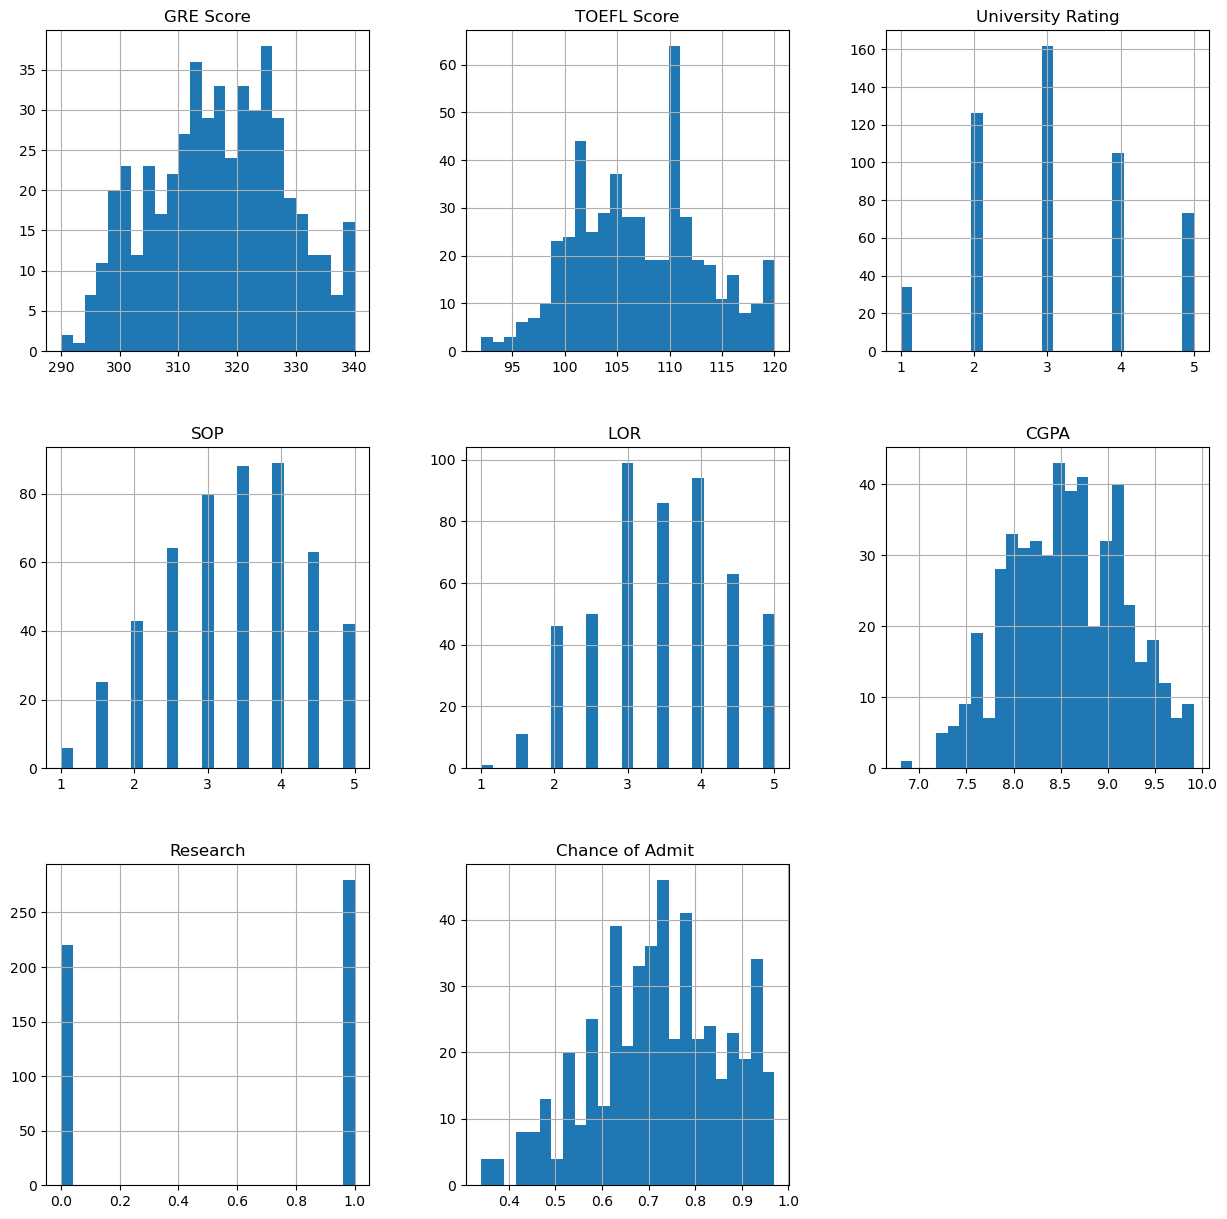

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

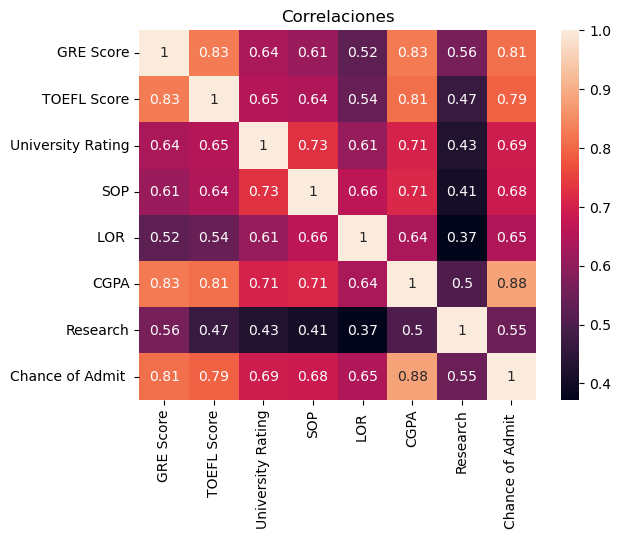

In [5]:
sns.heatmap(data.corr(),annot=True)
plt.title('Correlaciones')
plt.show()

In [6]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [7]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=100)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [8]:
Escalador = StandardScaler()
xTrain_Scaled = Escalador.fit_transform(xTrain)
xTest_Scaled = Escalador.transform(xTest)

MSE_metric ={}
MAE_metric ={}

epocas = 160
Funcion_Perdida = 'relu'

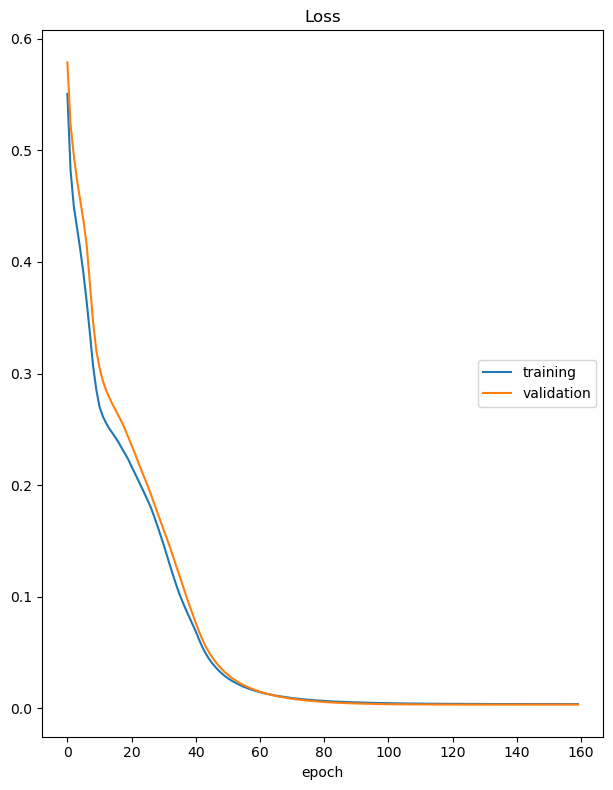

Loss
	training         	 (min:    0.004, max:    0.551, cur:    0.004)
	validation       	 (min:    0.003, max:    0.579, cur:    0.003)
5/5 [==============================] - 0s 2ms/step
El valor de MSE es: 0.0032864551283139
El valor de MAE es: 0.044018701346715296


In [9]:
# Celda 1

keras.backend.clear_session()

model = Sequential()
model.add(Dense(units=1, input_shape=(xTrain_Scaled.shape[1],),activation=Funcion_Perdida))

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(xTrain_Scaled, yTrain, 
          verbose=1, 
          epochs=epocas, 
          validation_data=(xTest_Scaled, yTest),
          callbacks=[PlotLossesKeras()])

yPred = model.predict(xTest_Scaled)

MSE_metric ={}
MAE_metric ={}
MSE_metric['modelo NN 1 Capa'] = mean_squared_error(yTest, yPred) 
MAE_metric['modelo NN 1 Capa'] = mean_absolute_error(yTest, yPred)

print('El valor de MSE es: ' +str(MSE_metric['modelo NN 1 Capa']))
print('El valor de MAE es: ' +str(MAE_metric['modelo NN 1 Capa']))

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

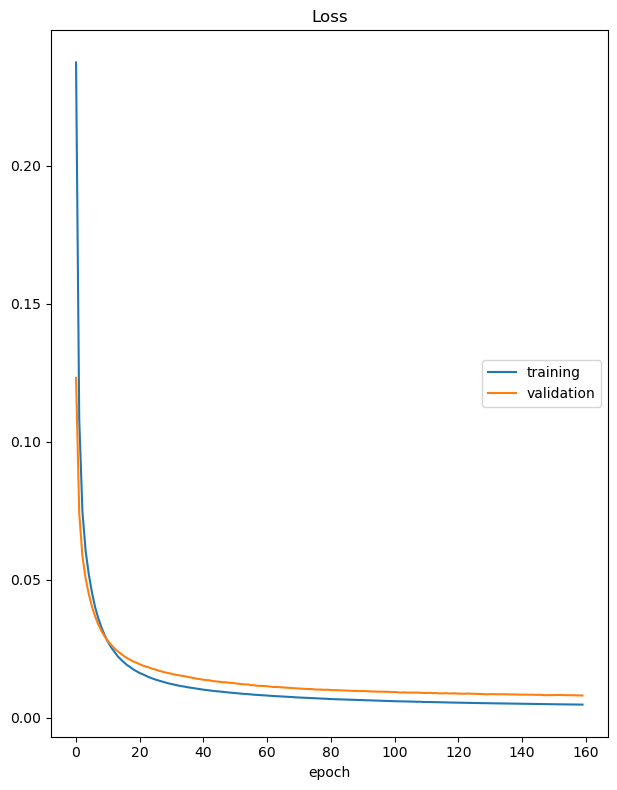

Loss
	training         	 (min:    0.005, max:    0.237, cur:    0.005)
	validation       	 (min:    0.008, max:    0.123, cur:    0.008)
5/5 [==============================] - 0s 2ms/step
El valor de MSE es: 0.00803851464134282
El valor de MAE es: 0.06726148308118184


In [11]:
# Celda 2
keras.backend.clear_session()

model = Sequential()
model.add(Dense(42, input_shape=(xTrain_Scaled.shape[1],),activation=Funcion_Perdida))
model.add(Dense(42,activation=Funcion_Perdida))
model.add(Dense(1,activation=Funcion_Perdida))

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(xTrain_Scaled, yTrain, 
          verbose=1, 
          epochs=epocas, 
          validation_data=(xTest_Scaled, yTest),
          callbacks=[PlotLossesKeras()])

yPred = model.predict(xTest_Scaled)

MSE_metric['modelo NN Multicapa'] = mean_squared_error(yTest, yPred) 
MAE_metric['modelo NN Multicapa'] = mean_absolute_error(yTest, yPred)

print('El valor de MSE es: ' +str(MSE_metric['modelo NN Multicapa']))
print('El valor de MAE es: ' +str(MAE_metric['modelo NN Multicapa']))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                336       
                                                                 
 dense_1 (Dense)             (None, 42)                1806      
                                                                 
 dense_2 (Dense)             (None, 1)                 43        
                                                                 
Total params: 2,185
Trainable params: 2,185
Non-trainable params: 0
_________________________________________________________________
None


Se utiliza Relu en la capa de salida debido a que como se habla de una probabilidad entre 0 y 1 no existen valores negativos

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

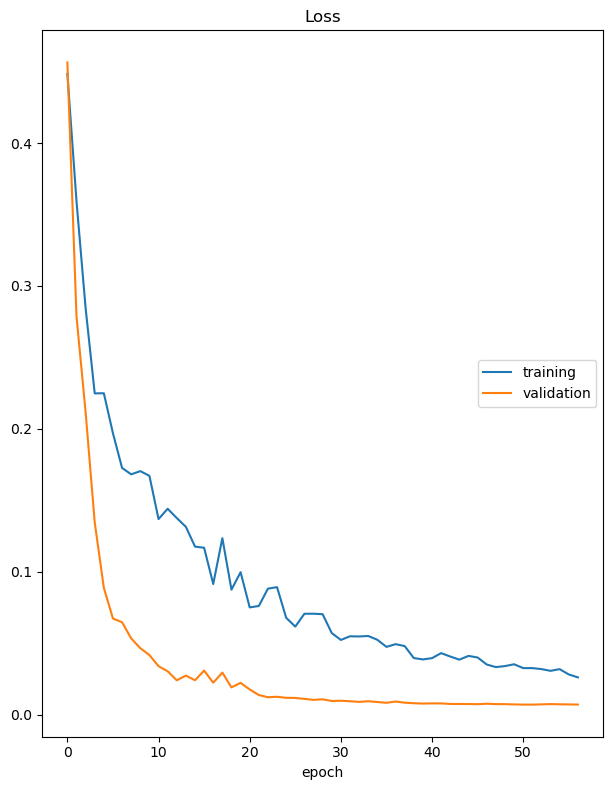

Loss
	training         	 (min:    0.026, max:    0.448, cur:    0.026)
	validation       	 (min:    0.007, max:    0.456, cur:    0.007)
11/11 [==============================] - 0s 18ms/step - loss: 0.0262 - val_loss: 0.0072
Epoch 57: early stopping
5/5 [==============================] - 0s 2ms/step
El valor de MSE es: 0.0071803062579388725
El valor de MAE es: 0.06864966734250387


In [13]:
# Celda 3
keras.backend.clear_session()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1) 

model = Sequential()
model.add(Dense(48, input_shape=(xTrain_Scaled.shape[1],),activation=Funcion_Perdida))
model.add(Dropout(0.3)) 
model.add(Dense(48,activation=Funcion_Perdida))
model.add(Dropout(0.3)) 


model.add(Dense(1,activation=Funcion_Perdida))

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(xTrain_Scaled, yTrain, 
          verbose=1, 
          epochs=epocas, 
          validation_data=(xTest_Scaled, yTest),
          callbacks=[PlotLossesKeras(),early_stop])

yPred = model.predict(xTest_Scaled)


MSE_metric['modelo NN MultiCapa con EarlyStop y Dropout'] = mean_squared_error(yTest, yPred) 
MAE_metric['modelo NN MultiCapa con EarlyStop y Dropout'] = mean_absolute_error(yTest, yPred)

print('El valor de MSE es: ' +str(MSE_metric['modelo NN MultiCapa con EarlyStop y Dropout']))
print('El valor de MAE es: ' +str(MAE_metric['modelo NN MultiCapa con EarlyStop y Dropout']))

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                384       
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                2352      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
_________________________________________________________________
None



Se utilizaron los sets de entrenamiento y validación usados en los puntos anteriores, para este caso se uso la función de perdida RELU, debido a que no acepta valores negativos, lo cual hace sentido debido a que la probabilidad solo puede variar entre 0 y 1, se utilizó el optimizador de gradiente descendiente estocastico debido a su alta eficiencia computacional, ya que actualiza los parametros de los pesos en cada iteración, se tomó el número de epocas 160 pues haciendo pruebas se encontró que era un valor optimo donde el modelo alcanza a tener buenos resultados en las métricas evaluadas MSE y MAE. Numero de neuronas

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

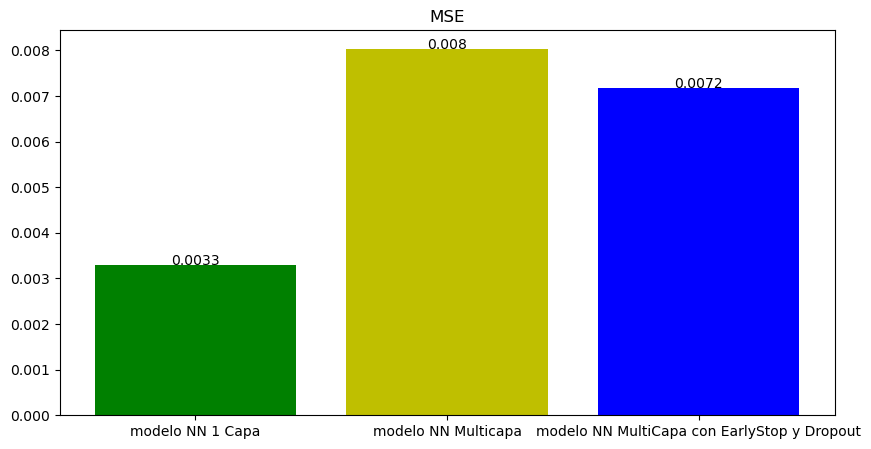

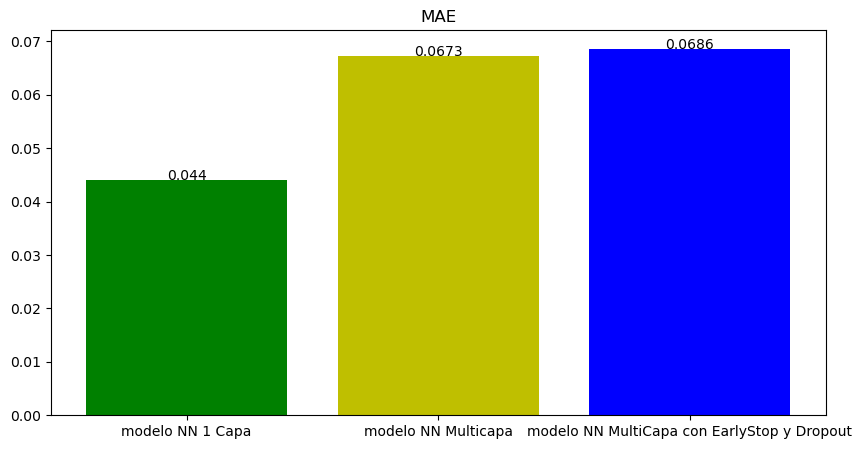

In [15]:
# Celda 4
colores = ['g','y','b']
dfmetrics= pd.DataFrame(zip(MAE_metric.values(),MSE_metric.values()),columns=['MAE','MSE'],index=MAE_metric.keys())

plt.figure(figsize=(10,5))
plt.bar(x=dfmetrics.index,height=dfmetrics['MSE'],color=colores)
num=0
for i in dfmetrics['MSE']:
    plt.text(x=num,y=i,s=round(i,4),ha='center')
    num+=1
plt.title('MSE')
plt.show()

plt.figure(figsize=(10,5))
plt.bar(x=dfmetrics.index,height=dfmetrics['MAE'],color=colores)
num=0
for i in dfmetrics['MAE']:
    plt.text(x=num,y=i,s=round(i,4),ha='center')
    num+=1
plt.title('MAE')
plt.show()



Basándonos en los resultados de los modelos de redes neuronales utilizando el MAE (Error Absoluto Medio) y MSE (Error Cuadrático Medio), podemos hacer las siguientes conclusiones:

Modelo NN de 1 Capa: Este modelo tiene el MAE más bajo y el MSE más bajo de todos los modelos evaluados. Esto indica que tiene un mejor rendimiento en la predicción de la probabilidad de admisión de los candidatos. Es una configuración simple con una sola capa y no incluye técnicas como el EarlyStop o Dropout. Sin embargo, logra resultados prometedores en términos de precisión.

Modelo NN Multicapa: Este modelo tiene un MAE ligeramente más alto y un MSE más alto en comparación con el modelo de 1 capa. Esto indica que agregar capas ocultas a la red neuronal no ha mejorado significativamente la precisión de la predicción en este caso. Aunque el modelo multicapa puede aprender representaciones más complejas, en este conjunto de datos específico no se observa una mejora sustancial, lo anterior puede deberse a la simplicidad de los datos y qué al estar las variables predictoras altamente correlacionadas con la probabilidad de admisión se podría comprender que el modelo de una capa se ajuste mejor a los datos y pueda generalizar mucho mejor.

Modelo NN MultiCapa con EarlyStop y Dropout: Este modelo tiene un MAE y MSE similares al modelo multicapa. La adición de técnicas como el EarlyStop y Dropout logra mejorar la precisión de la predicción en este caso reduciendo el MSE y el MAE con respecto al modelo Multicapa sin estas técnicas, lo anterior es debido a que el modelo puede evitar el sobreajuste y generalizar mejor los datos para obtener un mejor resultado.